# 1. Feature Enginerring

In [1]:
pip install --upgrade numpy gensim pandas openpyxl

  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl (15.9 MB)



In [2]:
#Load the data
import pandas as pd
import numpy as np
import gensim
from gensim.models import Word2Vec
import warnings
movie_data=pd.read_excel('movies.xlsx')
movie_data = movie_data.loc[:, ~movie_data.columns.str.contains('^Unnamed')]

C:\Users\ljy\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\ljy\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\ljy\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Check the data types of features
movie_data.dtypes

id                        int64
title                    object
genres                   object
overview                 object
popularity              float64
production_companies     object
release_month             int64
Nominate                  int64
dtype: object

# 1.1. Handle the missing value

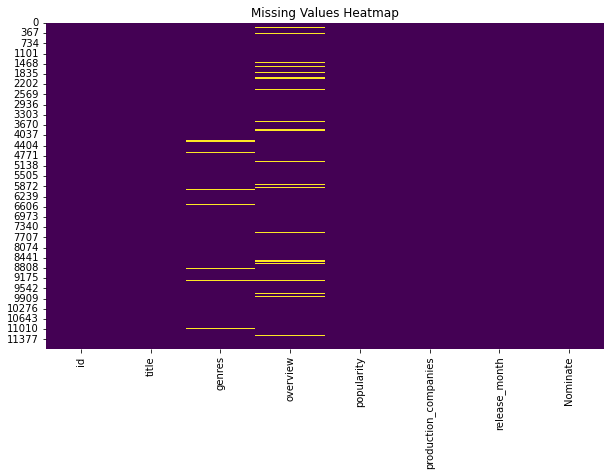

In [4]:
#Detect the missing value
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(movie_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [5]:
#Handle the missing value
# Delete rows where 'overview' or 'genres' contain missing values
movie_data_cleaned = movie_data.dropna(subset=['overview', 'genres'])

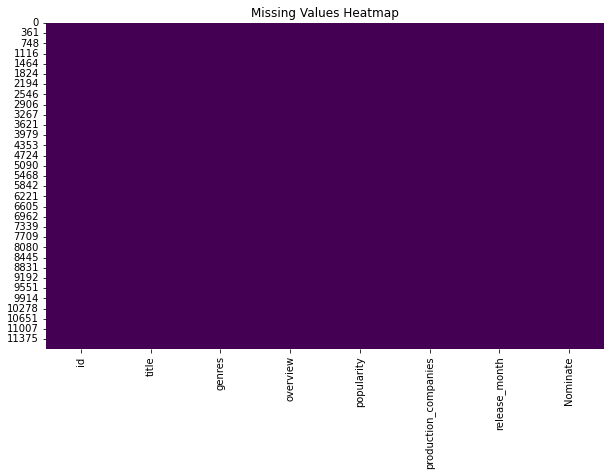

In [6]:
#Detect the missing value
plt.figure(figsize=(10, 6))
sns.heatmap(movie_data_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# 1.2. Handle the outliers

C:\Users\ljy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='popularity'>

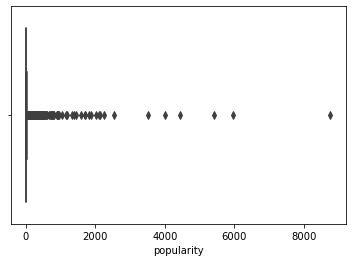

In [7]:
#Detect the Outliers
# Box Plot
import seaborn as sns
sns.boxplot(movie_data_cleaned['popularity'])

C:\Users\ljy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='release_month'>

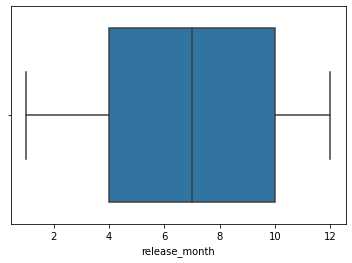

In [8]:
#Detect the Outliers
# Box Plot
import seaborn as sns
sns.boxplot(movie_data_cleaned['release_month'])

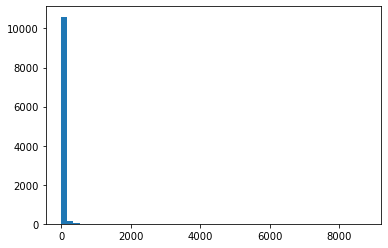

In [9]:
# Plot the data to visualize the skew
import matplotlib.pyplot as plt
plt.hist(movie_data_cleaned['popularity'], bins=50)
plt.show()

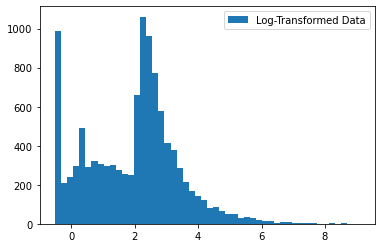

In [10]:
# Apply log transformation to the data
log_data = np.log(movie_data_cleaned['popularity'])

# Plot the original data and the log-transformed data
import matplotlib.pyplot as plt
#plt.hist(data, bins=50, label='Original Data')
plt.hist(log_data, bins=50, label='Log-Transformed Data')
plt.legend()
plt.show()

In [11]:
movie_data_cleaned['popularity'] = log_data
movie_data_cleaned

C:\Users\ljy\AppData\Local\Temp\ipykernel_8592\4117980629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data_cleaned['popularity'] = log_data


,id,title,genres,overview,popularity,production_companies,release_month,Nominate
0,636279,Bogot谩: City of the Lost,Crime-Drama,In the 1990s 19-year-old Kook-hee moves to Bog...,2.747720,Plus M Entertainment-Watermelon Pictures-IDIOPLAN,12,0
1,688662,Anomaly,Science Fiction-Horror-Action-Fantasy,"Gordon ""Gordy"" Lethbridge-Stewart thought he h...",2.709383,Reeltime Pictures,12,0
2,750334,Cattle Run,Drama,Brothers living like strangers for over 30 yea...,2.595180,Yong Film,12,0
5,926606,The Home,Horror,A troubled man starts working at a retirement ...,1.326544,Miramax,12,0
6,928603,Guilt,Horror-Fantasy,A man is haunted by a physical entity of his o...,2.413053,Flickerbox Films,12,0
...,...,...,...,...,...,...,...,...
11721,205972,Separation,Drama-TV Movie,When Sarah a New York actress calls Joe a Lond...,0.336472,BBC,6,0
11722,456633,Balloon,Drama,Youngsters find work as part-time festival str...,-0.174353,Toei Company,5,0
11723,16094,House Party,Comedy,Young Kid has been invited to a party at his f...,2.442173,New Line Cinema,3,0
11725,60778,Downtown,Action-Comedy,Officer Alex Kearney patrols an upscale neighb...,1.343387,20th Century Fox,1,0


# 1.3. Normalization

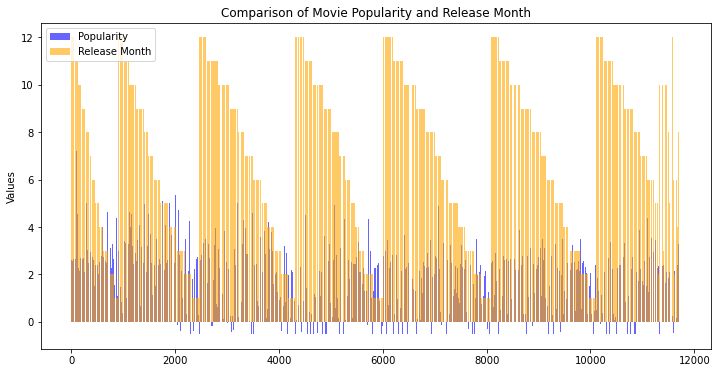

In [12]:
# Plot the 'popularity' and 'release_month' together to check the scale
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart for 'popularity'
ax.bar(movie_data_cleaned.index, movie_data_cleaned['popularity'], color='blue', label='Popularity', alpha=0.6)

# Plot the bar chart for 'release_month'
ax.bar(movie_data_cleaned.index, movie_data_cleaned['release_month'], color='orange', label='Release Month', alpha=0.6)

# Add y-axis label
ax.set_ylabel('Values')

# Add title and legend
plt.title('Comparison of Movie Popularity and Release Month')
ax.legend(loc='upper left')

plt.show()

In [13]:
# Copy the data 
df_max_scaled = movie_data_cleaned[['popularity','release_month']].copy() 
  
# Apply normalization techniques 
for column in df_max_scaled.columns: 
    df_max_scaled[column] = (df_max_scaled[column]- df_max_scaled[column].min())/(df_max_scaled[column].max()- df_max_scaled[column].min())
      
# View normalized data 
df_max_scaled

,popularity,release_month
0,0.339813,1.000000
1,0.335815,1.000000
2,0.323906,1.000000
5,0.191608,1.000000
6,0.304913,1.000000
...,...,...
11721,0.088359,0.454545
11722,0.035089,0.363636
11723,0.307949,0.181818
11725,0.193364,0.000000


In [14]:
#Replace the original two columns
movie_data_N = movie_data_cleaned.copy()
movie_data_N['popularity'] = df_max_scaled['popularity']
movie_data_N['release_month'] = df_max_scaled['release_month']

In [15]:
# View data after normalizing data 
movie_data_N 

,id,title,genres,overview,popularity,production_companies,release_month,Nominate
0,636279,Bogot谩: City of the Lost,Crime-Drama,In the 1990s 19-year-old Kook-hee moves to Bog...,0.339813,Plus M Entertainment-Watermelon Pictures-IDIOPLAN,1.000000,0
1,688662,Anomaly,Science Fiction-Horror-Action-Fantasy,"Gordon ""Gordy"" Lethbridge-Stewart thought he h...",0.335815,Reeltime Pictures,1.000000,0
2,750334,Cattle Run,Drama,Brothers living like strangers for over 30 yea...,0.323906,Yong Film,1.000000,0
5,926606,The Home,Horror,A troubled man starts working at a retirement ...,0.191608,Miramax,1.000000,0
6,928603,Guilt,Horror-Fantasy,A man is haunted by a physical entity of his o...,0.304913,Flickerbox Films,1.000000,0
...,...,...,...,...,...,...,...,...
11721,205972,Separation,Drama-TV Movie,When Sarah a New York actress calls Joe a Lond...,0.088359,BBC,0.454545,0
11722,456633,Balloon,Drama,Youngsters find work as part-time festival str...,0.035089,Toei Company,0.363636,0
11723,16094,House Party,Comedy,Young Kid has been invited to a party at his f...,0.307949,New Line Cinema,0.181818,0
11725,60778,Downtown,Action-Comedy,Officer Alex Kearney patrols an upscale neighb...,0.193364,20th Century Fox,0.000000,0


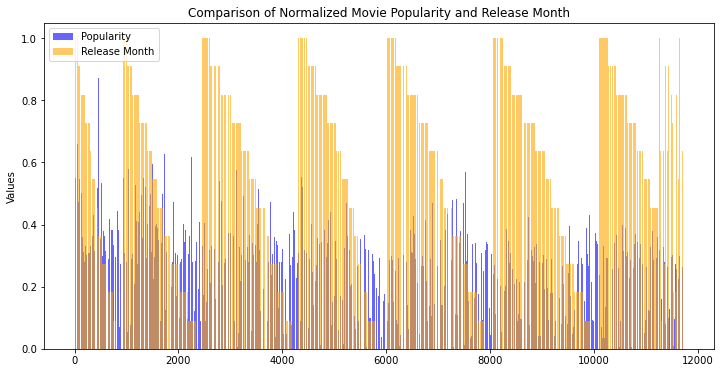

In [16]:
#Plot the 'popularity','release_month' together to check the scale after normalization
import matplotlib.pyplot as plt

# Plot the 'popularity' and 'release_month' together to check the scale
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart for 'popularity'
ax.bar(movie_data_N .index, movie_data_N ['popularity'], color='blue', label='Popularity', alpha=0.6)

# Plot the bar chart for 'release_month'
ax.bar(movie_data_N .index, movie_data_N ['release_month'], color='orange', label='Release Month', alpha=0.6)

# Add y-axis label
ax.set_ylabel('Values')

# Add title and legend
plt.title('Comparison of Normalized Movie Popularity and Release Month')
ax.legend(loc='upper left')

plt.show()

# 1.4. One-hot encoding

In [17]:
#Count the occurances of companies
company_counts = movie_data_N ['production_companies'].value_counts()

In [18]:
company_mapping = {company: company for company in company_counts[company_counts > 1].index}
company_mapping['others'] = 'others'

In [19]:
movie_data_N ['production_companies'] = movie_data_N ['production_companies'].map(company_mapping)
movie_data_N.columns

Index(['id', 'title', 'genres', 'overview', 'popularity',
       'production_companies', 'release_month', 'Nominate'],
      dtype='object')

In [20]:
#One-hot encoding on 'genres','release_month','production_companies'
one_hot_encoded_df = pd.get_dummies(movie_data_N , columns=['genres','release_month','production_companies'])

In [21]:
one_hot_encoded_df.columns

Index(['id', 'title', 'overview', 'popularity', 'Nominate', 'genres_Action',
       'genres_Action-Adventure',
       'genres_Action-Adventure-Animation-Comedy-Family',
       'genres_Action-Adventure-Animation-Drama',
       'genres_Action-Adventure-Animation-Family',
       ...
       'production_companies_Zee Studios International',
       'production_companies_Zeitsprung Pictures',
       'production_companies_Zentropa Entertainments',
       'production_companies_Zeta Cinema',
       'production_companies_Zik Zak Filmworks',
       'production_companies_Zip Cinema',
       'production_companies_bildundtonfabrik', 'production_companies_khara',
       'production_companies_micro_scope', 'production_companies_ufotable'],
      dtype='object', length=2833)

In [22]:
one_hot_encoded_df.head()

,id,title,overview,popularity,Nominate,genres_Action,genres_Action-Adventure,genres_Action-Adventure-Animation-Comedy-Family,genres_Action-Adventure-Animation-Drama,genres_Action-Adventure-Animation-Family,...,production_companies_Zee Studios International,production_companies_Zeitsprung Pictures,production_companies_Zentropa Entertainments,production_companies_Zeta Cinema,production_companies_Zik Zak Filmworks,production_companies_Zip Cinema,production_companies_bildundtonfabrik,production_companies_khara,production_companies_micro_scope,production_companies_ufotable
0,636279,Bogot谩: City of the Lost,In the 1990s 19-year-old Kook-hee moves to Bog...,0.339813,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,688662,Anomaly,"Gordon ""Gordy"" Lethbridge-Stewart thought he h...",0.335815,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,750334,Cattle Run,Brothers living like strangers for over 30 yea...,0.323906,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,926606,The Home,A troubled man starts working at a retirement ...,0.191608,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,928603,Guilt,A man is haunted by a physical entity of his o...,0.304913,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
#Copy the columns which will be used in Predition part
onehot_columns=one_hot_encoded_df.columns

# 1.5. Vector Representation of text

In [24]:
import numpy as np  # Import NumPy for numerical operations

# Define a function to tokenize text, convert tokens to indices, and pad sequences
def tokenize_and_pad(texts, vocab, max_len=100):
    # Tokenize each text in the list of texts
    tokenized_texts = [tokenizer(text) for text in texts]
    # Convert each token to its corresponding index in the vocabulary
    indexed_texts = [vocab(tokens) for tokens in tokenized_texts]
    # Pad each sequence to the maximum length or truncate if it's longer
    padded_texts = [
        seq + [vocab['<pad>']] * (max_len - len(seq)) if len(seq) < max_len
        else seq[:max_len] for seq in indexed_texts
    ]
    # Return a NumPy array containing the padded texts
    return np.array(padded_texts)

In [25]:
GoogleModel = gensim.models.KeyedVectors.load_word2vec_format(r"C:\Users\ljy\Downloads\GoogleNews-vectors-negative300.bin.gz", binary=True)

In [26]:
# Count vectorization of text
from sklearn.feature_extraction.text import CountVectorizer

#Removing NA
one_hot_encoded_df = one_hot_encoded_df.dropna(subset=['overview']).reset_index(drop=True)
corpus = one_hot_encoded_df['overview'].values

# Creating the vectorizer
vectorizer = CountVectorizer(stop_words='english',max_features=10000)

# Converting the text to numeric data
X = vectorizer.fit_transform(corpus)

#print(vectorizer.get_feature_names())

# Preparing Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
CountVectorizedData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
CountVectorizedData['Nominate']=one_hot_encoded_df['Nominate']
print(CountVectorizedData.shape)
CountVectorizedData.head()

(10810, 10001)


,0s,10,100,1000,10000,100000,10th,11,12,120,...,zo茅,zul,脕lvaro,脫scar,鈥嬧,鈥楾he,鈥檚,鈥淭he,鈥渢he,Nominate
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Creating the list of words which are present in the Document term matrix
WordsVocab=CountVectorizedData.columns[:-1]
 
# Printing sample words
WordsVocab[0:10]

Index(['0s', '10', '100', '1000', '10000', '100000', '10th', '11', '12',
       '120'],
      dtype='object')

In [28]:
# Defining a function which takes text input and returns one vector for each sentence
def FunctionText2Vec(inpTextData):
    # Converting the text to numeric data
    X = vectorizer.transform(inpTextData)
    CountVecData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    
    # Creating empty dataframe to hold sentences
    W2Vec_Data=pd.DataFrame()
    
    # Looping through each row for the data
    for i in range(CountVecData.shape[0]):

        # initiating a sentence with all zeros
        Sentence = np.zeros(300)

        # Looping thru each word in the sentence and if its present in 
        # the Word2Vec model then storing its vector
        for word in WordsVocab[CountVecData.iloc[i , :]>=1]:
            #print(word)
            if word in GoogleModel.key_to_index.keys():    
                Sentence=Sentence+GoogleModel[word]
        # Appending the sentence to the dataframe
        W2Vec_Data = pd.concat([W2Vec_Data, pd.DataFrame([Sentence])], ignore_index=True)
    return(W2Vec_Data)

In [29]:
# Calling the function to convert all the text data to Word2Vec Vectors
W2Vec_Data=FunctionText2Vec(one_hot_encoded_df['overview'])

# Checking the new representation for sentences
W2Vec_Data.shape

(10810, 300)

In [30]:
#Merge the data frame
W2Vec_Data_df = pd.DataFrame(W2Vec_Data)
movies_df = pd.concat([one_hot_encoded_df.reset_index(drop=True), W2Vec_Data_df.reset_index(drop=True)], axis=1)

In [31]:
movies_df.columns

Index([                                             'id',
                                                 'title',
                                              'overview',
                                            'popularity',
                                              'Nominate',
                                         'genres_Action',
                               'genres_Action-Adventure',
       'genres_Action-Adventure-Animation-Comedy-Family',
               'genres_Action-Adventure-Animation-Drama',
              'genres_Action-Adventure-Animation-Family',
       ...
                                                     290,
                                                     291,
                                                     292,
                                                     293,
                                                     294,
                                                     295,
                                                     296,
   

In [32]:
# check the number of negative Nominate
movies_df[movies_df["Nominate"]==0].shape

(10740, 3133)

In [33]:
# check the number of positive Nominate
movies_df[movies_df["Nominate"]==1].shape
#There is DATA IMBALANCE problem, which will be solved later

(70, 3133)

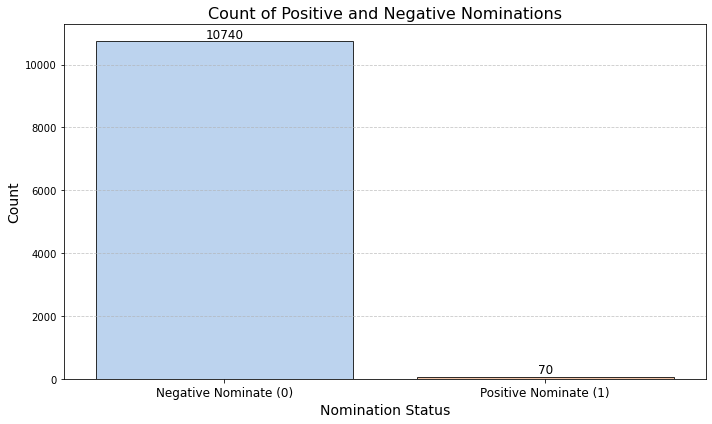

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of positive and negative nominations
nominations_count = movies_df['Nominate'].value_counts()

# Create a bar plot with increased size and style enhancements
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=nominations_count.index, y=nominations_count.values, palette='pastel', alpha=0.8, edgecolor='black')

# Add labels and title with increased font size
plt.xticks(ticks=[0, 1], labels=['Negative Nominate (0)', 'Positive Nominate (1)'], fontsize=12)
plt.xlabel('Nomination Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Positive and Negative Nominations', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of the bars
for index, value in enumerate(nominations_count.values):
    plt.text(index, value + 0.05, str(value), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()  # Adjusts the padding of the plot
plt.show()

# 2. Building ML Model

In [35]:
# Separate Target Variable and Predictor Variables
Predictors = movies_df.iloc[:, 5:].columns.tolist() 
Predictors.append('popularity') 

TargetVariable = 'Nominate'

X = movies_df[Predictors].values  
y = movies_df[TargetVariable].values 

In [36]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=520)
 
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7567, 3129)
(7567,)
(3243, 3129)
(3243,)


# 2.1. KNN

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

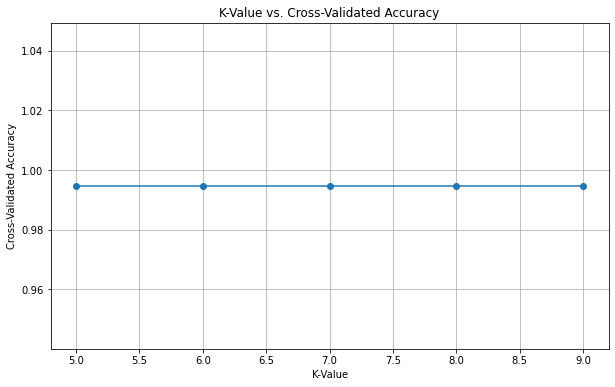

The optimal k value is: 5


In [38]:
# Finding the best k value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_range = range(5, 10)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.title('K-Value vs. Cross-Validated Accuracy')
plt.xlabel('K-Value')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

# Optimal k value
optimal_k = k_range[np.argmax(k_scores)]
print(f'The optimal k value is: {optimal_k}')


In [39]:
# Initialize and train the KNN classifier
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)

KNeighborsClassifier()

C:\Users\ljy\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


---- Scores ----
Accuracy score is: 99.07%
Precision score is: 0.0
Recall score is: 0.0
F1 score is: 0.0
ROC AUC score is: 0.51


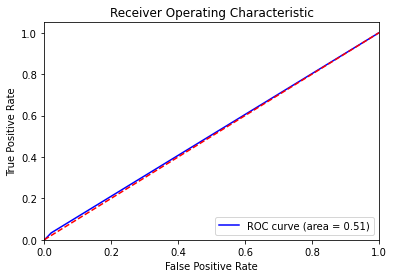

In [40]:
y_pred = clf_knn.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Accuracy, Precision, Recall and F1 Score
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
score4 = f1_score(y_test, y_pred)


y_prob = clf_knn.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc1 = auc(fpr, tpr)


print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1 * 100, 2)))
print("Precision score is: {}".format(round(score2, 2)))
print("Recall score is: {}".format(round(score3, 2)))
print("F1 score is: {}".format(round(score4, 2)))
print("ROC AUC score is: {}".format(round(roc_auc1, 2)))

# Plot ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [41]:
# Create the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

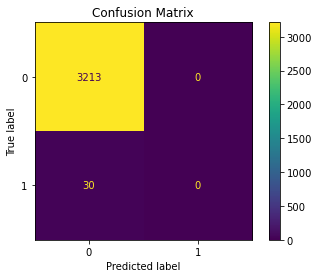

In [42]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [43]:
#SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

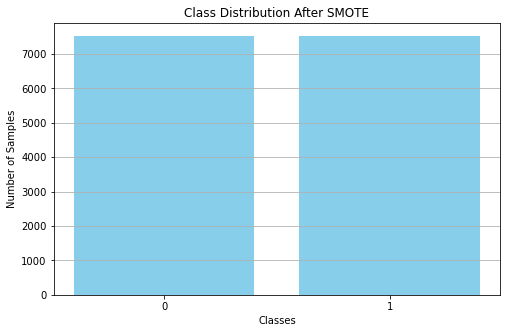

In [44]:
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

# Count the occurrences of each class
counter_smote = Counter(y_train_smote)

# Prepare data for plotting
classes = list(counter_smote.keys())
counts = list(counter_smote.values())

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution After SMOTE')
plt.xticks(classes)  # Set x-ticks to class labels
plt.grid(axis='y')

# Show the plot
plt.show()

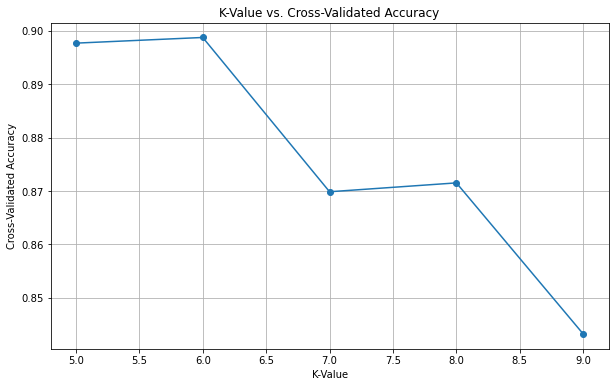

The optimal k value is: 6


In [45]:
# Finding the best k value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_range = range(5, 10)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_smote, y_train_smote, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.title('K-Value vs. Cross-Validated Accuracy')
plt.xlabel('K-Value')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

# Optimal k value
optimal_k = k_range[np.argmax(k_scores)]
print(f'The optimal k value is: {optimal_k}')

In [46]:
# Initialize and train the KNN classifier
clf_knn.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

---- Scores ----
Accuracy score is: 81.16%
Precision score is: 0.03
Recall score is: 0.67
F1 score is: 0.06
ROC AUC score is: 0.75


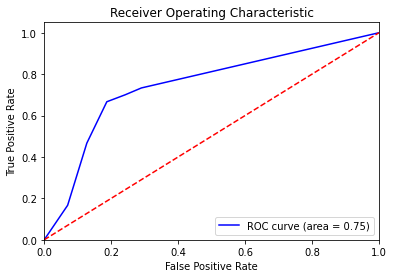

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
y_pred = clf_knn.predict(X_test)

# Accuracy, Precision, Recall and F1 Score
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
score4 = f1_score(y_test, y_pred)


y_prob = clf_knn.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc2 = auc(fpr, tpr)


print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1 * 100, 2)))
print("Precision score is: {}".format(round(score2, 2)))
print("Recall score is: {}".format(round(score3, 2)))
print("F1 score is: {}".format(round(score4, 2)))
print("ROC AUC score is: {}".format(round(roc_auc2, 2)))

# Plot ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [48]:
# Create the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

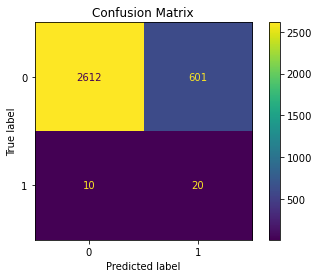

In [49]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [50]:
#Compare the model before and after SMOTE by comparing roc_auc
if roc_auc2  > roc_auc1 :
    print("SMOTE improved the model.")
else:
    print("SMOTE did not improve the model.")

SMOTE improved the model.


# 2.2. Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [52]:
# Fitting Random Forest to the Training set
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=520)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=520)

---- Scores ----
Accuracy score is: 99.07%
Precision score is: 0.0
Recall score is: 0.0
F1 score is: 0.0
ROC AUC score is: 0.74


C:\Users\ljy\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


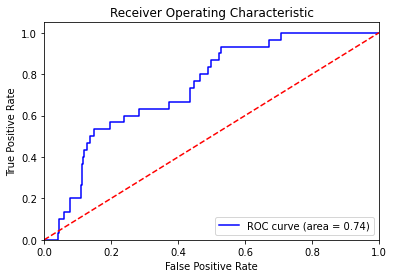

In [53]:
y_pred = clf_rf.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Accuracy, Precision, Recall and F1 Score
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
score4 = f1_score(y_test, y_pred)


y_prob = clf_rf.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc3 = auc(fpr, tpr)


print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1 * 100, 2)))
print("Precision score is: {}".format(round(score2, 2)))
print("Recall score is: {}".format(round(score3, 2)))
print("F1 score is: {}".format(round(score4, 2)))
print("ROC AUC score is: {}".format(round(roc_auc3, 2)))

# Plot ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [54]:
# Create the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

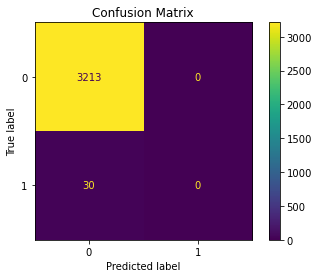

In [55]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [56]:
# Train the model on the oversampled training data
clf_rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=5, random_state=520)

---- Scores ----
Accuracy score is: 98.33%
Precision score is: 0.04
Recall score is: 0.03
F1 score is: 0.04
ROC AUC score is: 0.7


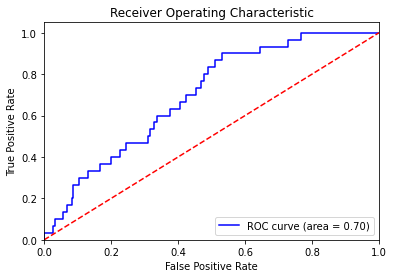

In [57]:
#Prediction on test data set
y_pred = clf_rf.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Accuracy, Precision, Recall and F1 Score
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
score4 = f1_score(y_test, y_pred)

#Area under the ROC
y_prob = clf_rf.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc4 = auc(fpr, tpr)


print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1 * 100, 2)))
print("Precision score is: {}".format(round(score2, 2)))
print("Recall score is: {}".format(round(score3, 2)))
print("F1 score is: {}".format(round(score4, 2)))
print("ROC AUC score is: {}".format(round(roc_auc4, 2)))

# Plot ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [58]:
# Create the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

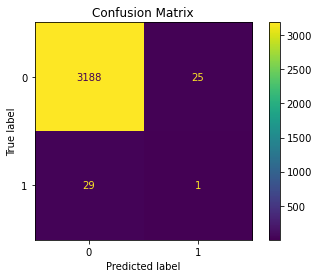

In [59]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [60]:
#Compare the model before and after SMOTE by comparing roc_auc
if roc_auc4  > roc_auc3 :
    print("SMOTE improved the model.")
else:
    print("SMOTE did not improve the model.")

SMOTE did not improve the model.


#  2.3. Naive Bayes

In [61]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB()
clf_nb .fit(X_train, y_train)

GaussianNB()

In [62]:
# Predicting the Test set results
y_pred = clf_nb.predict(X_test)

---- Scores ----
Accuracy score is: 81.84%
Precision score is: 0.03
Recall score is: 0.57
F1 score is: 0.05
ROC AUC score is: 0.69


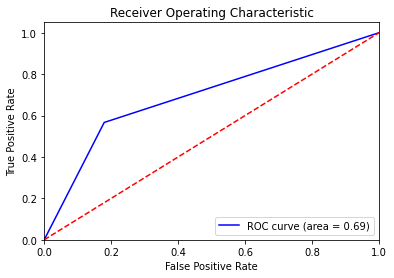

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Accuracy, Precision, Recall and F1 Score
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
score4 = f1_score(y_test, y_pred)

#Area under the ROC
y_prob = clf_nb.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc5 = auc(fpr, tpr)


print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1 * 100, 2)))
print("Precision score is: {}".format(round(score2, 2)))
print("Recall score is: {}".format(round(score3, 2)))
print("F1 score is: {}".format(round(score4, 2)))
print("ROC AUC score is: {}".format(round(roc_auc5, 2)))

# Plot ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [64]:
# Create the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

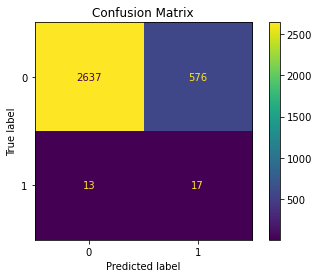

In [65]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [66]:
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

# Count the occurrences of each class
counter_smote = Counter(y_train_smote)
counter_smote

Counter({0: 7527, 1: 7527})

In [67]:
# Train the model on the oversampled training data
clf_nb.fit(X_train_smote, y_train_smote)

GaussianNB()

In [68]:
# Predicting the Test set results
y_pred = clf_nb.predict(X_test)

---- Scores ----
Accuracy score is: 81.84%
Precision score is: 0.03
Recall score is: 0.57
F1 score is: 0.05
ROC AUC score is: 0.69


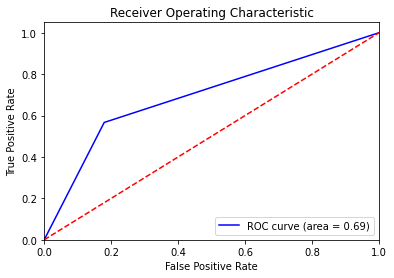

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Accuracy, Precision, Recall and F1 Score
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
score4 = f1_score(y_test, y_pred)

#Area under the ROC
y_prob = clf_nb.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc6 = auc(fpr, tpr)

#Area under the ROC
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1 * 100, 2)))
print("Precision score is: {}".format(round(score2, 2)))
print("Recall score is: {}".format(round(score3, 2)))
print("F1 score is: {}".format(round(score4, 2)))
print("ROC AUC score is: {}".format(round(roc_auc6, 2)))

# Plot ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc6)
plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [70]:
# Create the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

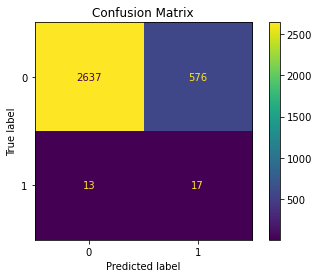

In [71]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [72]:
#Compare the model before and after SMOTE by comparing roc_auc
if roc_auc6  > roc_auc5 :
    print("SMOTE improved the model.")
else:
    print("SMOTE did not improve the model.")

SMOTE did not improve the model.


# 2.4. Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression()

In [74]:
clf_log.fit(X_train, y_train)

LogisticRegression()

In [75]:
# Predicting the Test set results
y_pred = clf_log.predict(X_test)

---- Scores ----
Accuracy score is: 98.89%
Precision score is: 0.0
Recall score is: 0.0
F1 score is: 0.0
ROC AUC score is: 0.81


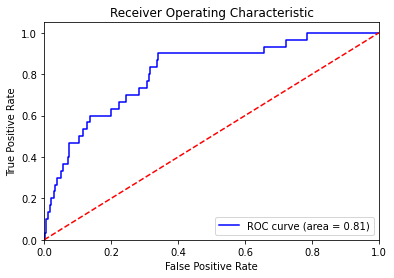

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Accuracy, Precision, Recall and F1 Score
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
score4 = f1_score(y_test, y_pred)

#Area under the ROC
y_prob = clf_log.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc7 = auc(fpr, tpr)


print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1 * 100, 2)))
print("Precision score is: {}".format(round(score2, 2)))
print("Recall score is: {}".format(round(score3, 2)))
print("F1 score is: {}".format(round(score4, 2)))
print("ROC AUC score is: {}".format(round(roc_auc7, 2)))

# Plot ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc7)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 对角线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [77]:
# Create the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

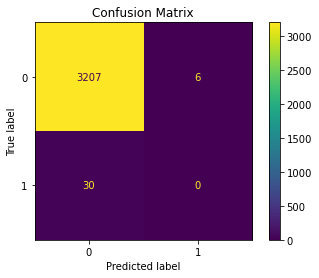

In [78]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [79]:
# Train the model on the oversampled training data
clf_log.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [80]:
# Predicting the Test set results
y_pred = clf_log.predict(X_test)

---- Scores ----
Accuracy score is: 98.37%
Precision score is: 0.07
Recall score is: 0.07
F1 score is: 0.07
ROC AUC score is: 0.77


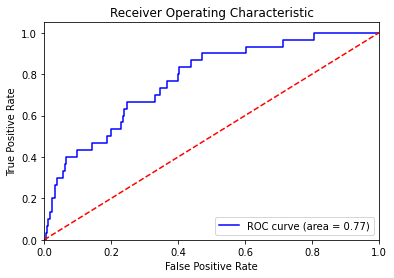

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Accuracy, Precision, Recall and F1 Score
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
score4 = f1_score(y_test, y_pred)

#Area under the ROC
y_prob = clf_log.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc8 = auc(fpr, tpr)


print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1 * 100, 2)))
print("Precision score is: {}".format(round(score2, 2)))
print("Recall score is: {}".format(round(score3, 2)))
print("F1 score is: {}".format(round(score4, 2)))
print("ROC AUC score is: {}".format(round(roc_auc8, 2)))

# Plot ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc8)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 对角线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [82]:
# Create the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

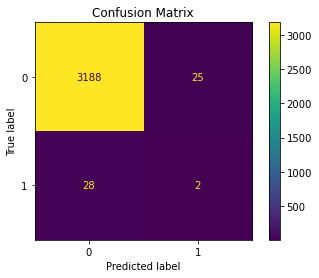

In [83]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [84]:
#Compare the model before and after SMOTE by comparing roc_auc
if roc_auc8  > roc_auc7 :
    print("SMOTE improved the model.")
else:
    print("SMOTE did not improve the model.")

SMOTE did not improve the model.


# 2.5. Neural Networks

In [85]:
# The hidden_layer_sizes parameter in scikit-learn’s MLPClassifier determines the architecture of the neural network by 
# specifying the number of hidden layers and the number of neurons in each layer
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(hidden_layer_sizes=(64, 32),
                    max_iter=1000, random_state=520)

In [86]:
# Train the model on the training data
clf_mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=520)

In [87]:
# Predicting the Test set results
y_pred = clf_mlp.predict(X_test)

---- Scores ----
Accuracy score is: 99.01%
Precision score is: 0.0
Recall score is: 0.0
F1 score is: 0.0
ROC AUC score is: 0.74


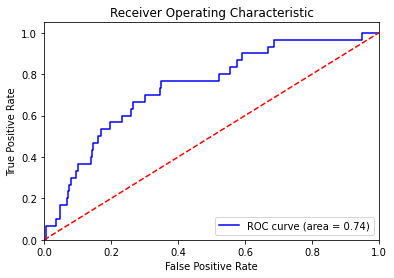

In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Accuracy, Precision, Recall and F1 Score
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
score4 = f1_score(y_test, y_pred)

#Area under the ROC
y_prob = clf_mlp.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc9 = auc(fpr, tpr)


print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1 * 100, 2)))
print("Precision score is: {}".format(round(score2, 2)))
print("Recall score is: {}".format(round(score3, 2)))
print("F1 score is: {}".format(round(score4, 2)))
print("ROC AUC score is: {}".format(round(roc_auc9, 2)))

# Plot ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc9)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [89]:
# Create the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

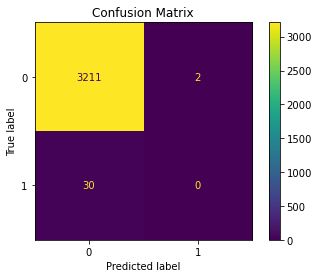

In [90]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [91]:
# Train the model on the oversampled training data
clf_mlp.fit(X_train_smote, y_train_smote)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=520)

In [92]:
# Predicting the Test set results
y_pred = clf_mlp.predict(X_test)

---- Scores ----
Accuracy score is: 98.89%
Precision score is: 0.2
Recall score is: 0.07
F1 score is: 0.1
ROC AUC score is: 0.69


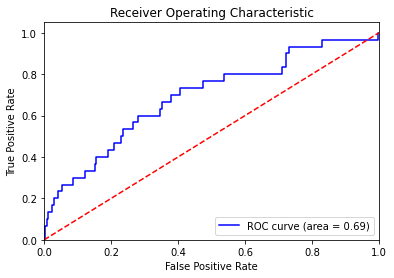

In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Accuracy, Precision, Recall and F1 Score
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
score4 = f1_score(y_test, y_pred)

#Area under the ROC
y_prob = clf_mlp.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc10 = auc(fpr, tpr)


print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1 * 100, 2)))
print("Precision score is: {}".format(round(score2, 2)))
print("Recall score is: {}".format(round(score3, 2)))
print("F1 score is: {}".format(round(score4, 2)))
print("ROC AUC score is: {}".format(round(roc_auc10, 2)))

# Plot ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc10)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 对角线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [94]:
# Create the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

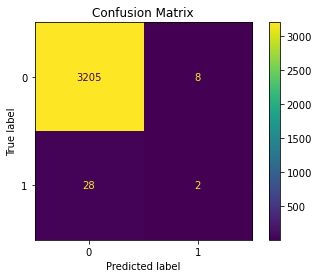

In [95]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [96]:
#Compare the model before and after SMOTE by comparing roc_auc
if roc_auc10  > roc_auc9 :
    print("SMOTE improved the model.")
else:
    print("SMOTE did not improve the model.")

SMOTE did not improve the model.


# 3. Model Selection

In [97]:
# Assume you have already calculated the ROC AUC scores for different models
roc_auc_scores = {
    'KNN':max(roc_auc1,roc_auc2),
    'Random Forest':max(roc_auc3,roc_auc4),
    'Naive Bayes':max(roc_auc5,roc_auc6),
    'Logistic Regression':max(roc_auc7,roc_auc8),
    'Neural Networks':max(roc_auc9,roc_auc10),
    # Other models' ROC AUC scores
}

# Print the ROC AUC scores for all models
for model_name, auc in roc_auc_scores.items():
    print(f"{model_name} ROC AUC Score: {auc:.2f}")

# Find the best model based on ROC AUC score
best_model = max(roc_auc_scores, key=roc_auc_scores.get)
best_auc_score = roc_auc_scores[best_model]

# Print the best model
print(f"\nBest Model: {best_model} with ROC AUC Score: {best_auc_score:.2f}")

KNN ROC AUC Score: 0.75
Random Forest ROC AUC Score: 0.74
Naive Bayes ROC AUC Score: 0.69
Logistic Regression ROC AUC Score: 0.81
Neural Networks ROC AUC Score: 0.74

Best Model: Logistic Regression with ROC AUC Score: 0.81


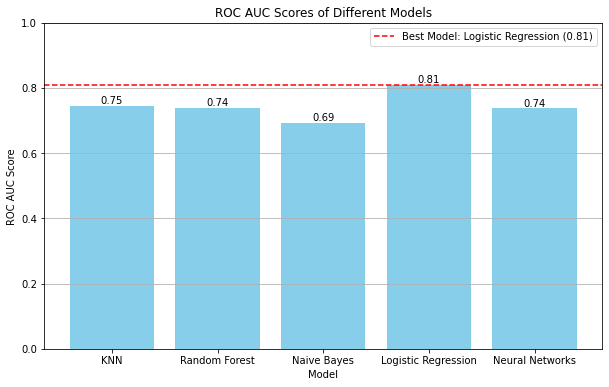

In [98]:
plt.figure(figsize=(10, 6))
models = list(roc_auc_scores.keys())
scores = list(roc_auc_scores.values())

bars = plt.bar(models, scores, color='skyblue')

for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, score, f'{score:.2f}', 
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Model')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Scores of Different Models')
plt.ylim(0, 1)  
plt.axhline(y=best_auc_score, color='red', linestyle='--', label=f'Best Model: {best_model} ({best_auc_score:.2f})')

plt.legend()
plt.grid(axis='y')
plt.show()

# 4. Prediction

In [99]:
#We use the model with the best performance in in-sample data to predic the nominees for Best Picture at the 97th Oscar Awards
#Load the data to be used in prediction
prediction_data=pd.read_excel('prediction_data.xlsx')
prediction_data.head()

,id,title,genres,overview,popularity,production_companies,release_month
0,920989,Kimbadanti,Adventure-History-Science Fiction,A period piece that also includes elements of ...,0.866,NexGen Venture,12
1,799766,Better Man,Music-Comedy-Drama,From boy band euphoria to solo stadium tours t...,13.199,Footloose Productions-Zero Gravity Management-...,12
2,661539,A Complete Unknown,Drama-Music-History,Set in the influential New York music scene of...,11.000,Veritas Entertainment Group-The Picture Compan...,12
3,426063,Nosferatu,Drama-Fantasy-Horror,A gothic tale of obsession between a haunted y...,34.957,Studio 8-Focus Features-Maiden Voyage Pictures...,12
4,939243,Sonic the Hedgehog 3,Science Fiction-Family-Comedy-Adventure,Sonic Tails and Knuckles face a mysterious new...,73.385,Paramount Pictures-Original Film-Marza Animati...,12


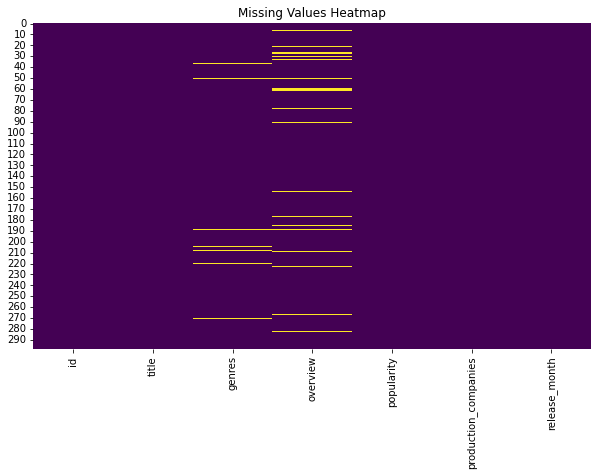

In [100]:
#Detect the missing value
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(prediction_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [101]:
#Handle the missing value
# Delete rows where 'overview' or 'genres' contain missing values
prediction_data_cleaned = prediction_data.dropna(subset=['overview', 'genres'])

In [102]:
#Log transformation
log_data = np.log(prediction_data_cleaned['popularity'])
prediction_data['popularity'] = log_data

In [103]:
# copy the data 
df_max_scaled = prediction_data[['popularity','release_month']].copy() 
  
# apply normalization techniques 
for column in df_max_scaled.columns: 
    df_max_scaled[column] = (df_max_scaled[column]- df_max_scaled[column].min())/(df_max_scaled[column].max()- df_max_scaled[column].min())
      
# view normalized data 
df_max_scaled

,popularity,release_month
0,0.000000,1.0
1,0.311673,1.0
2,0.290821,1.0
3,0.423113,1.0
4,0.507964,1.0
...,...,...
294,0.376663,0.0
295,0.423495,0.0
296,0.265277,0.0
297,0.274143,0.0


In [104]:
#Replace the original two columns
prediction_data_N = prediction_data.copy()
prediction_data_N['popularity'] = df_max_scaled['popularity']
prediction_data_N['release_month'] = df_max_scaled['release_month']

In [105]:
#Count the occurances of companies
company_counts = prediction_data_N ['production_companies'].value_counts()

In [106]:
prediction_data_N ['production_companies'] = prediction_data_N ['production_companies'].apply(
    lambda x: company_mapping.get(x, 'others')
)
class_counts = prediction_data_N ['production_companies'].value_counts()
print(class_counts)

production_companies
others                                    267
Legendary Pictures                          2
Viva Films                                  2
Disney Television Animation                 1
Haarika & Hassine Creations                 1
LD Entertainment                            1
SRS Cinema                                  1
Surinder Films                              1
Warner Bros. Animation                      1
PRK Productions                             1
Fabula                                      1
Marvel Studios-Kevin Feige Productions      1
Mythri Movie Makers                         1
StudioCanal                                 1
Dharma Productions-Zee Studios              1
Falcon Pictures                             1
Globo Filmes                                1
Jaguar Studios                              1
Nickelodeon Movies                          1
Staar Movies                                1
Yoodlee Films                               1
Fuzz on the L

In [107]:
#One-hot encoding
one_hot_encoded_df1 = pd.get_dummies(prediction_data_N , columns=['genres','release_month','production_companies'])
one_hot_encoded_df1 = one_hot_encoded_df1.reindex(columns=onehot_columns,fill_value=0)

In [108]:
one_hot_encoded_df1

,id,title,overview,popularity,Nominate,genres_Action,genres_Action-Adventure,genres_Action-Adventure-Animation-Comedy-Family,genres_Action-Adventure-Animation-Drama,genres_Action-Adventure-Animation-Family,...,production_companies_Zee Studios International,production_companies_Zeitsprung Pictures,production_companies_Zentropa Entertainments,production_companies_Zeta Cinema,production_companies_Zik Zak Filmworks,production_companies_Zip Cinema,production_companies_bildundtonfabrik,production_companies_khara,production_companies_micro_scope,production_companies_ufotable
0,920989,Kimbadanti,A period piece that also includes elements of ...,0.000000,0,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,799766,Better Man,From boy band euphoria to solo stadium tours t...,0.311673,0,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,661539,A Complete Unknown,Set in the influential New York music scene of...,0.290821,0,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,426063,Nosferatu,A gothic tale of obsession between a haunted y...,0.423113,0,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,939243,Sonic the Hedgehog 3,Sonic Tails and Knuckles face a mysterious new...,0.507964,0,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,836972,He Went That Way,Set in 1964 a three-day journey along Route 66...,0.376663,0,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
295,779816,White Bird,Julian Albans the bully who left Beecher Prep ...,0.423495,0,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,580988,Uma & Haggen,In a futuristic society with a pre-hispanic he...,0.265277,0,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,635711,Next to Us,Set ten years on from high school drama Next t...,0.274143,0,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
# Count vectorization of text
from sklearn.feature_extraction.text import CountVectorizer

#Removing NA
one_hot_encoded_df1 = one_hot_encoded_df1.dropna(subset=['overview']).reset_index(drop=True)
corpus = one_hot_encoded_df1['overview'].values

# Creating the vectorizer
vectorizer = CountVectorizer(stop_words='english',max_features=10000)

# Converting the text to numeric data
X = vectorizer.fit_transform(corpus)

#print(vectorizer.get_feature_names())

# Preparing Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
CountVectorizedData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(CountVectorizedData.shape)
CountVectorizedData.head()

(281, 3481)


,0s,100,11,12,13,14,15,16,17,1800,...,zodiac,zoe,zone,z茅,淩ock,聽聽,鈥嬧,鈥攁,鈥楾he,鈥渟mart鈥
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
# Creating the list of words which are present in the Document term matrix
WordsVocab=CountVectorizedData.columns[:]
 
# Printing sample words
WordsVocab

Index(['0s', '100', '11', '12', '13', '14', '15', '16', '17', '1800',
       ...
       'zodiac', 'zoe', 'zone', 'z茅', '淩ock', '聽聽', '鈥嬧', '鈥攁', '鈥楾he',
       '鈥渟mart鈥'],
      dtype='object', length=3481)

In [111]:
# Defining a function which takes text input and returns one vector for each sentence
def FunctionText2Vec(inpTextData):
    # Converting the text to numeric data
    X = vectorizer.transform(inpTextData)
    CountVecData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    
    # Creating empty dataframe to hold sentences
    W2Vec_Data=pd.DataFrame()
    
    # Looping through each row for the data
    for i in range(len(CountVecData)):

        # initiating a sentence with all zeros
        Sentence = np.zeros(300)
       

        # Looping thru each word in the sentence and if its present in 
        # the Word2Vec model then storing its vector
        for word in WordsVocab[CountVecData.iloc[i , :]>=1]:
            #print(word)
            if word in GoogleModel.key_to_index.keys():    
                Sentence=Sentence+GoogleModel[word]
        # Appending the sentence to the dataframe
        W2Vec_Data = pd.concat([W2Vec_Data, pd.DataFrame([Sentence])], ignore_index=True)
    return(W2Vec_Data)

In [112]:
print(CountVectorizedData.shape)
print(WordsVocab.shape)

(281, 3481)
(3481,)


In [113]:
# Calling the function to convert all the text data to Word2Vec Vectors
W2Vec_Data1=FunctionText2Vec(one_hot_encoded_df1['overview'])

# Checking the new representation for sentences
W2Vec_Data1.shape

(281, 300)

In [114]:
#Merge the data frame
W2Vec_Data_df1 = pd.DataFrame(W2Vec_Data1)
prediction_df = pd.concat([one_hot_encoded_df1.reset_index(drop=True), W2Vec_Data_df1.reset_index(drop=True)], axis=1)

In [115]:
W2Vec_Data_df1

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.636230,0.992554,0.626495,1.681274,-0.603516,0.584946,1.162964,-0.959221,0.116333,0.200775,...,-2.471924,0.307312,-1.421387,0.266251,-0.408641,-2.062988,0.613861,-0.877380,0.618896,0.208496
1,1.897949,1.033966,-0.034973,2.713867,-0.334167,-2.541687,0.151516,-5.195026,3.964783,2.928894,...,-0.928833,0.186852,-2.616180,-0.929138,-2.165375,-2.175214,0.653450,-2.452271,-0.258453,1.365128
2,1.422668,0.316345,-1.013741,1.601624,-0.010864,-1.282425,-1.299683,-2.875732,1.550357,0.468750,...,0.630737,-0.616516,-1.846039,-0.816284,-0.838867,-1.810059,0.851364,-0.986877,0.860413,0.588928
3,2.596436,0.545898,-0.121826,0.172424,-1.060501,1.837402,0.439941,-0.806244,1.395508,2.304932,...,-1.516479,0.844238,-2.163574,0.342285,-2.072739,-1.158691,0.639160,-0.692749,0.589203,1.283386
4,0.463013,1.093384,0.674072,-0.599121,-1.064709,0.817902,-0.185913,-1.147858,1.194275,1.999268,...,-1.153381,0.197517,-1.732666,0.802124,-0.538803,-1.040962,0.129517,-0.257843,-0.623322,1.322693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,0.509247,2.443176,-0.393173,2.959473,-0.321716,-0.392822,0.910583,-1.859558,1.531494,1.430191,...,-0.500801,0.051125,-2.818024,0.155133,0.166870,-1.660156,-1.729385,-0.036072,-1.041626,0.066345
277,1.228729,3.215591,0.935364,2.109711,-1.156738,1.593140,0.020386,-2.284119,1.422485,2.067764,...,-2.916458,1.633118,-3.949707,-1.223267,-3.666214,-1.281158,0.881561,-2.499008,-0.246399,1.525146
278,0.675842,0.970825,0.500244,0.882812,-0.581299,-0.472351,0.854492,-0.481384,1.378906,-0.654480,...,-1.387329,0.110123,-3.048950,-0.538361,0.097992,0.283157,-0.123718,-0.925049,0.952332,0.497192
279,0.518402,0.692688,-0.310059,1.019241,-0.032959,0.225464,0.001480,-0.107361,0.841522,0.227356,...,-1.571655,0.353760,-1.895508,-0.576721,0.024658,-0.218018,-0.082970,-0.108398,0.624481,0.324066


In [116]:
one_hot_encoded_df1

,id,title,overview,popularity,Nominate,genres_Action,genres_Action-Adventure,genres_Action-Adventure-Animation-Comedy-Family,genres_Action-Adventure-Animation-Drama,genres_Action-Adventure-Animation-Family,...,production_companies_Zee Studios International,production_companies_Zeitsprung Pictures,production_companies_Zentropa Entertainments,production_companies_Zeta Cinema,production_companies_Zik Zak Filmworks,production_companies_Zip Cinema,production_companies_bildundtonfabrik,production_companies_khara,production_companies_micro_scope,production_companies_ufotable
0,920989,Kimbadanti,A period piece that also includes elements of ...,0.000000,0,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,799766,Better Man,From boy band euphoria to solo stadium tours t...,0.311673,0,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,661539,A Complete Unknown,Set in the influential New York music scene of...,0.290821,0,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,426063,Nosferatu,A gothic tale of obsession between a haunted y...,0.423113,0,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,939243,Sonic the Hedgehog 3,Sonic Tails and Knuckles face a mysterious new...,0.507964,0,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,836972,He Went That Way,Set in 1964 a three-day journey along Route 66...,0.376663,0,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277,779816,White Bird,Julian Albans the bully who left Beecher Prep ...,0.423495,0,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278,580988,Uma & Haggen,In a futuristic society with a pre-hispanic he...,0.265277,0,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279,635711,Next to Us,Set ten years on from high school drama Next t...,0.274143,0,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
prediction_df

,id,title,overview,popularity,Nominate,genres_Action,genres_Action-Adventure,genres_Action-Adventure-Animation-Comedy-Family,genres_Action-Adventure-Animation-Drama,genres_Action-Adventure-Animation-Family,...,290,291,292,293,294,295,296,297,298,299
0,920989,Kimbadanti,A period piece that also includes elements of ...,0.000000,0,False,False,0,0,0,...,-2.471924,0.307312,-1.421387,0.266251,-0.408641,-2.062988,0.613861,-0.877380,0.618896,0.208496
1,799766,Better Man,From boy band euphoria to solo stadium tours t...,0.311673,0,False,False,0,0,0,...,-0.928833,0.186852,-2.616180,-0.929138,-2.165375,-2.175214,0.653450,-2.452271,-0.258453,1.365128
2,661539,A Complete Unknown,Set in the influential New York music scene of...,0.290821,0,False,False,0,0,0,...,0.630737,-0.616516,-1.846039,-0.816284,-0.838867,-1.810059,0.851364,-0.986877,0.860413,0.588928
3,426063,Nosferatu,A gothic tale of obsession between a haunted y...,0.423113,0,False,False,0,0,0,...,-1.516479,0.844238,-2.163574,0.342285,-2.072739,-1.158691,0.639160,-0.692749,0.589203,1.283386
4,939243,Sonic the Hedgehog 3,Sonic Tails and Knuckles face a mysterious new...,0.507964,0,False,False,0,0,0,...,-1.153381,0.197517,-1.732666,0.802124,-0.538803,-1.040962,0.129517,-0.257843,-0.623322,1.322693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,836972,He Went That Way,Set in 1964 a three-day journey along Route 66...,0.376663,0,False,False,0,0,0,...,-0.500801,0.051125,-2.818024,0.155133,0.166870,-1.660156,-1.729385,-0.036072,-1.041626,0.066345
277,779816,White Bird,Julian Albans the bully who left Beecher Prep ...,0.423495,0,False,False,0,0,0,...,-2.916458,1.633118,-3.949707,-1.223267,-3.666214,-1.281158,0.881561,-2.499008,-0.246399,1.525146
278,580988,Uma & Haggen,In a futuristic society with a pre-hispanic he...,0.265277,0,False,False,0,0,0,...,-1.387329,0.110123,-3.048950,-0.538361,0.097992,0.283157,-0.123718,-0.925049,0.952332,0.497192
279,635711,Next to Us,Set ten years on from high school drama Next t...,0.274143,0,False,False,0,0,0,...,-1.571655,0.353760,-1.895508,-0.576721,0.024658,-0.218018,-0.082970,-0.108398,0.624481,0.324066


In [128]:
missing_columns = prediction_df.columns[prediction_df.isnull().any()].tolist()
print("Missing value columns:", missing_columns)

Missing value columns: []


In [129]:
# 删除包含缺失值的行
prediction_df['popularity'].fillna(prediction_df['popularity'].median(), inplace=True)

C:\Users\ljy\AppData\Local\Temp\ipykernel_8592\57584706.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  prediction_df['popularity'].fillna(prediction_df['popularity'].median(), inplace=True)


In [130]:
missing_columns = prediction_df.columns[prediction_df.isnull().any()].tolist()
print("Missing value columns:", missing_columns)

Missing value columns: []


In [131]:
# Separate Target Variable and Predictor Variables
Predictors = prediction_df.iloc[:, 5:].columns.tolist() 
Predictors.append('popularity') 

X1 = prediction_df[Predictors].values  
prediction_df

,id,title,overview,popularity,Nominate,genres_Action,genres_Action-Adventure,genres_Action-Adventure-Animation-Comedy-Family,genres_Action-Adventure-Animation-Drama,genres_Action-Adventure-Animation-Family,...,290,291,292,293,294,295,296,297,298,299
0,920989,Kimbadanti,A period piece that also includes elements of ...,0.000000,0,False,False,0,0,0,...,-2.471924,0.307312,-1.421387,0.266251,-0.408641,-2.062988,0.613861,-0.877380,0.618896,0.208496
1,799766,Better Man,From boy band euphoria to solo stadium tours t...,0.311673,0,False,False,0,0,0,...,-0.928833,0.186852,-2.616180,-0.929138,-2.165375,-2.175214,0.653450,-2.452271,-0.258453,1.365128
2,661539,A Complete Unknown,Set in the influential New York music scene of...,0.290821,0,False,False,0,0,0,...,0.630737,-0.616516,-1.846039,-0.816284,-0.838867,-1.810059,0.851364,-0.986877,0.860413,0.588928
3,426063,Nosferatu,A gothic tale of obsession between a haunted y...,0.423113,0,False,False,0,0,0,...,-1.516479,0.844238,-2.163574,0.342285,-2.072739,-1.158691,0.639160,-0.692749,0.589203,1.283386
4,939243,Sonic the Hedgehog 3,Sonic Tails and Knuckles face a mysterious new...,0.507964,0,False,False,0,0,0,...,-1.153381,0.197517,-1.732666,0.802124,-0.538803,-1.040962,0.129517,-0.257843,-0.623322,1.322693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,836972,He Went That Way,Set in 1964 a three-day journey along Route 66...,0.376663,0,False,False,0,0,0,...,-0.500801,0.051125,-2.818024,0.155133,0.166870,-1.660156,-1.729385,-0.036072,-1.041626,0.066345
277,779816,White Bird,Julian Albans the bully who left Beecher Prep ...,0.423495,0,False,False,0,0,0,...,-2.916458,1.633118,-3.949707,-1.223267,-3.666214,-1.281158,0.881561,-2.499008,-0.246399,1.525146
278,580988,Uma & Haggen,In a futuristic society with a pre-hispanic he...,0.265277,0,False,False,0,0,0,...,-1.387329,0.110123,-3.048950,-0.538361,0.097992,0.283157,-0.123718,-0.925049,0.952332,0.497192
279,635711,Next to Us,Set ten years on from high school drama Next t...,0.274143,0,False,False,0,0,0,...,-1.571655,0.353760,-1.895508,-0.576721,0.024658,-0.218018,-0.082970,-0.108398,0.624481,0.324066


In [132]:
# Get the predicted probabilities for each class by using the best model-random forest
probabilities = clf_log.predict_proba(X1)

# Extract the probability of class 1
probability_of_one = probabilities[:, 1]

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Title': prediction_df['title'].values,  # Assuming prediction_df contains titles
    'Sample Index': range(len(probability_of_one)),  # Sample index
    'Probability of Class 1': probability_of_one  # Probability of class 1
})

# Filter out entries with titles that are 'NA' or NaN
results_df = results_df[results_df['Title'].notna() & (results_df['Title'] != 'NA')]

# Sort the DataFrame by probability in descending order
sorted_results_df = results_df.sort_values(by='Probability of Class 1', ascending=False)

# Select only the required columns for display
final_results_df = sorted_results_df[['Title', 'Sample Index', 'Probability of Class 1']]

# Print formatted results
print("\nThe nominees for Best Picture at the 97th Oscar Awards are:")
print("=" * 70)
print(f"{'Sample Index':<15} {'Title':<30}") 
print("=" * 70)

for index, row in final_results_df.head(10).iterrows():
    print(f"{row['Sample Index']:<15} {row['Title']:<30} ")  

print("=" * 70)


The nominees for Best Picture at the 97th Oscar Awards are:
Sample Index    Title                         
176             Kingdom of the Planet of the Apes 
20              Here                           
54              The Killer's Game              
206             Rebel Moon - Part Two: The Scargiver 
204             Maidaan                        
152             Bad Boys: Ride or Die          
60              Transformers One               
77              Harvest                        
133             Horizon: An American Saga - Chapter 1 
102             My Darling Family              
